In [1]:
# Pacotes 
from LightPipes import *
from matplotlib import image
from scipy.fft import fft2, ifft2 ,fftshift
from scipy import special
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import scipy
import random

## 1 distribuição

## Varias Distribuições 

In [2]:
# Parâmetros do feixe TGSM
lambd = 780*nm        # light wavelength
sigma = .15*mm         # largura
delta = .05*mm         # comprimento de coerência

# Parâmetros da expansão (eqs 6-8)
k = 2*np.pi/lambd
a = 1/(4*sigma**2) # [L]^-2
b = 1/(2*delta**2) # [L]^-2

mu = round(1/(k*delta**2), 6)
print("mu",mu)
print(mu*k*delta**2)
print("b=",b)
print("1/delta**2=", mu*k/2 )

mu 49.656342
0.999999995072707
b= 200000000.0
1/delta**2= 199999999.0145414


0.9999999999059263
Numeros de modos 11
0.9999999999059265
Numeros de modos 21
0.9999999999059263
Numeros de modos 36
0.9999999999059265
Numeros de modos 50


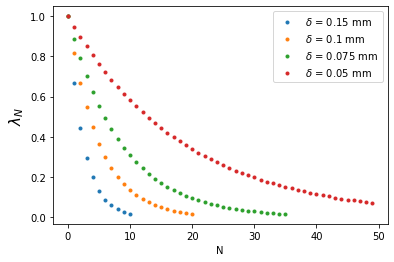

In [7]:
for ii in [15,10,7.5,5]:
  # Parâmetros do feixe TGSM
  lambd = 780*nm        # light wavelength
  sigma = .15*mm         # largura
  delta = 0.01*ii*mm         # comprimento de coerência

  # Parâmetros da expansão (eqs 6-8)
  k = 2*np.pi/lambd
  a = 1/(4*sigma**2) # [L]^-2
  b = 1/(2*delta**2) # [L]^-2
  mu = round(1/(k*delta**2), 8)
  print(mu*k*delta**2)
  t = np.sqrt(abs((b+k*mu/2)/(b-k*mu/2))) # # no unit, always positive
  auxNum = np.sqrt(4*a**2+8*a*b+(k*mu)**2) # [L]^-2, always positive
  w = np.sqrt(2/auxNum) # [L], always positive
  chi = ((2*a+2*b-auxNum)/(2*a+2*b+auxNum)) # no unit, always positive??
  weight_cutoff = 0.015
  # Determinando os modos que precisam entrar na decomposição
  p_par=np.arange(0,10)
  l_par=np.arange(-50,50)
  lp_par = np.zeros((l_par.size*p_par.size,2),dtype=int)
  bla = np.zeros((l_par.size*p_par.size))
  weight_00 = np.pi/2*w**2*(1-chi)*t**0*chi**(abs(0)/2+0)

  contador=0
  for i in p_par:
    #print(p_par[i])
    for j in l_par:
      weight = np.pi/2*w**2*(1-chi)*t**l_par[j]*abs(chi)**(abs(l_par[j])/2+p_par[i])
      #print(l_par[j], p_par[i], abs(chi)**(abs(l_par[j])/2+p_par[i]))
      if weight/weight_00 >= weight_cutoff:
        bla[contador] = weight
        contador = contador +1
  print("Numeros de modos",contador )
  bla    = bla[:contador]
  #plt.subplots(figsize=(15,2))
  plt.plot( bla/weight_00,'.',label =f'$\delta$ = {delta/mm} mm' )
  plt.ylabel('$\lambda_N$ ', fontsize=15)
  plt.xlabel('N')
  plt.legend()

plt.show()

## Distribuição de auto valores para diferente valores de twist

0.19999999095917562
Numeros de modos 95
1.006920722304421e-07
Numeros de modos 91


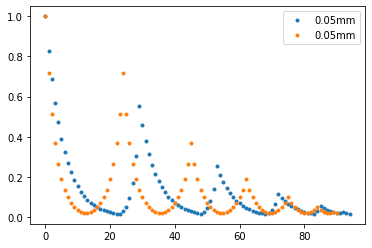

In [14]:
for ii in [0.2 , 0.0000001]:
  # Parâmetros do feixe TGSM
  lambd = 780*nm        # light wavelength
  sigma = .15*mm         # largura
  delta = 0.1*mm         # comprimento de coerência

  # Parâmetros da expansão (eqs 6-8)
  k = 2*np.pi/lambd
  a = 1/(4*sigma**2) # [L]^-2
  b = 1/(2*delta**2) # [L]^-2
  mu = round( (ii)/(k*delta**2), 6)
  print(mu*k*delta**2)
  t = np.sqrt(abs((b+k*mu/2)/(b-k*mu/2))) # # no unit, always positive
  auxNum = np.sqrt(4*a**2+8*a*b+(k*mu)**2) # [L]^-2, always positive
  w = np.sqrt(2/auxNum) # [L], always positive
  chi = ((2*a+2*b-auxNum)/(2*a+2*b+auxNum)) # no unit, always positive??
  weight_cutoff = 0.015
  # Determinando os modos que precisam entrar na decomposição
  p_par=np.arange(0,20)
  l_par=np.arange(-50,50)
  lp_par = np.zeros((l_par.size*p_par.size,2),dtype=int)
  bla = np.zeros((l_par.size*p_par.size))
  weight_00 = np.pi/2*w**2*(1-chi)*t**0*chi**(abs(0)/2+0)

  contador=0
  for i in p_par:
    #print(p_par[i])
    for j in l_par:
      weight = np.pi/2*w**2*(1-chi)*t**l_par[j]*abs(chi)**(abs(l_par[j])/2+p_par[i])
      #print(l_par[j], p_par[i], abs(chi)**(abs(l_par[j])/2+p_par[i]))
      if weight/weight_00 >= weight_cutoff:
        bla[contador] = weight
        contador = contador +1
  print("Numeros de modos",contador )
  bla    = bla[:contador]
  #plt.subplots(figsize=(15,2))
  plt.plot( bla/weight_00,'.',label =f'{delta/mm}mm' )
  plt.legend()

plt.show()

1.0000000031280727
Numeros de modos 21
0.5000000015640363
Numeros de modos 27
0.10000000353495357
Numeros de modos 28


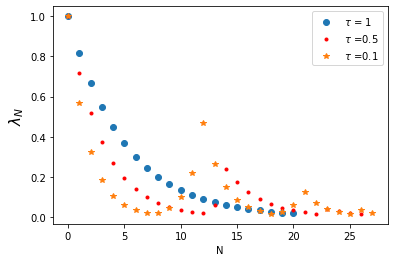

In [10]:
import sys
# Parâmetros do feixe TGSM
lambd = 780*nm        # light wavelength
sigma = .15*mm         # largura
delta = 0.1*mm         # comprimento de coerência

# Parâmetros da expansão (eqs 6-8)
k = 2*np.pi/lambd
a = 1/(4*sigma**2) # [L]^-2
b = 1/(2*delta**2) # [L]^-2

T = 1

mu = round( T/(k*delta**2), 7)
print(mu*k*delta**2)


t = np.sqrt(abs((b+k*mu/2)/(b-k*mu/2))) # # no unit, always positive
auxNum = np.sqrt(4*a**2+8*a*b+(k*mu)**2) # [L]^-2, always positive
w = np.sqrt(2/auxNum) # [L], always positive
chi = ((2*a+2*b-auxNum)/(2*a+2*b+auxNum)) # no unit, always positive??
weight_cutoff = 0.015
  # Determinando os modos que precisam entrar na decomposição
p_par=np.arange(0,10)
l_par=np.arange(-50,50)
lp_par = np.zeros((l_par.size*p_par.size,2),dtype=int)
bla = np.zeros((l_par.size*p_par.size))
weight_00 = np.pi/2*w**2*(1-chi)*t**0*chi**(abs(0)/2+0)

contador=0
for i in p_par:
  for j in l_par:
    weight = np.pi/2*w**2*(1-chi)*t**l_par[j]*abs(chi)**(abs(l_par[j])/2+p_par[i])
    if weight/weight_00 >= weight_cutoff:
      bla[contador] = weight
      contador = contador +1
print("Numeros de modos",contador )
bla    = bla[:contador]
plt.plot( bla/weight_00,'o',label =f'$\u03C4$ = {T}' )
plt.legend()

######################################


# Parâmetros da expansão (eqs 6-8)
k = 2*np.pi/lambd
a = 1/(4*sigma**2) # [L]^-2
b = 1/(2*delta**2) # [L]^-2
T = 0.5
mu = round( T/(k*delta**2), 7)
print(mu*k*delta**2)

t = np.sqrt(abs((b+k*mu/2)/(b-k*mu/2))) # # no unit, always positive
auxNum = np.sqrt(4*a**2+8*a*b+(k*mu)**2) # [L]^-2, always positive
w = np.sqrt(2/auxNum) # [L], always positive
chi = ((2*a+2*b-auxNum)/(2*a+2*b+auxNum)) # no unit, always positive??
weight_cutoff = 0.015
  # Determinando os modos que precisam entrar na decomposição
p_par=np.arange(0,10)
l_par=np.arange(-50,50)
lp_par = np.zeros((l_par.size*p_par.size,2),dtype=int)
bla = np.zeros((l_par.size*p_par.size))
weight_00 = np.pi/2*w**2*(1-chi)*t**0*chi**(abs(0)/2+0)

contador=0
for i in p_par:
  for j in l_par:
    weight = np.pi/2*w**2*(1-chi)*t**l_par[j]*abs(chi)**(abs(l_par[j])/2+p_par[i])
    if weight/weight_00 >= weight_cutoff:
      bla[contador] = weight
      contador = contador +1
print("Numeros de modos",contador )
bla    = bla[:contador]
plt.plot( bla/weight_00,'r.',label =f'$\u03C4$ ={T}' )
plt.legend()

####################################################################


# Parâmetros da expansão (eqs 6-8)
k = 2*np.pi/lambd
a = 1/(4*sigma**2) # [L]^-2
b = 1/(2*delta**2) # [L]^-2
T = 0.1
mu = round( T/(k*delta**2), 7)
print(mu*k*delta**2)

t = np.sqrt(abs((b+k*mu/2)/(b-k*mu/2))) # # no unit, always positive
auxNum = np.sqrt(4*a**2+8*a*b+(k*mu)**2) # [L]^-2, always positive
w = np.sqrt(2/auxNum) # [L], always positive
chi = ((2*a+2*b-auxNum)/(2*a+2*b+auxNum)) # no unit, always positive??
weight_cutoff = 0.015
  # Determinando os modos que precisam entrar na decomposição
p_par=np.arange(0,10)
l_par=np.arange(-50,50)
lp_par = np.zeros((l_par.size*p_par.size,2),dtype=int)
bla = np.zeros((l_par.size*p_par.size))
weight_00 = np.pi/2*w**2*(1-chi)*t**0*chi**(abs(0)/2+0)

contador=0
for i in p_par:
  for j in l_par:
    weight = np.pi/2*w**2*(1-chi)*t**l_par[j]*abs(chi)**(abs(l_par[j])/2+p_par[i])
    if weight/weight_00 >= weight_cutoff:
      bla[contador] = weight
      contador = contador +1
print("Numeros de modos",contador )
bla    = bla[:contador]
plt.plot( bla/weight_00,'*',label =f'$\u03C4$ ={T}' )
plt.ylabel('$\lambda_N$ ', fontsize=15)
plt.xlabel('N')
plt.legend()

plt.show()

## Intensidade e DOC 

In [2]:
# Parâmetros do feixe TGSM
lambd = 780*nm        # light wavelength
sigma = .15*mm         # largura
delta = .05*mm         # comprimento de coerência
# Parâmetros da expansão (eqs 6-8)
k = 2*np.pi/lambd
a = 1/(4*sigma**2) # [L]^-2
b = 1/(2*delta**2) # [L]^-2
mu = round(1/(k*delta**2), 8)

t = np.sqrt(abs((b+k*mu/2)/(b-k*mu/2))) # # no unit, always positive
auxNum = np.sqrt(4*a**2+8*a*b+(k*mu)**2) # [L]^-2, always positive
w = np.sqrt(2/auxNum) # [L], always positive
chi = ((2*a+2*b-auxNum)/(2*a+2*b+auxNum)) # no unit, always positive??
weight_cutoff = 0.015
print("Valor de twist normalizado",k*mu*delta**2)
# Determinando os modos que precisam entrar na decomposição
p_par=np.arange(0,10)
l_par=np.arange(-50,50)
lp_par = np.zeros((l_par.size*p_par.size,2),dtype=int)
bla = np.zeros((l_par.size*p_par.size))
#lp_par[0] = [1,1]
#print(lp_par)
weight_00 = np.pi/2*w**2*(1-chi)*t**0*chi**(abs(0)/2+0)

contador=0
for i in p_par:
  #print(p_par[i])
  for j in l_par:
    weight = np.pi/2*w**2*(1-chi)*t**l_par[j]*abs(chi)**(abs(l_par[j])/2+p_par[i])
    #print(l_par[j], p_par[i], abs(chi)**(abs(l_par[j])/2+p_par[i]))
    if weight/weight_00 >= weight_cutoff:
      lp_par[contador,:]=[l_par[j], p_par[i]]
      bla[contador] = weight
      contador = contador +1
lp_par = lp_par[:contador,:]
bla    = bla[:contador]


#print("Número total de modos: ", contador, ". Ver modos [L,P] abaixo:")
#print(lp_par)

#fig, ax = plt.subplots(figsize=(7,2))
#ax.plot(np.arange(0,lp_par.shape[0]), bla/weight_00,'o')
#ax.set_ylim(.015,1)
#ax.set_xticks(np.arange(0,lp_par.shape[0]))
#ax.set_xticklabels(lp_par,rotation=90)
#plt.xlabel('[n,m]')
#plt.ylabel('$\lambda_{n,m}$ / $\lambda_{00}$')
#plt.show()

Valor de twist normalizado 0.9999999999059265


Campo 

In [3]:
def caiLG(L,P,w0,lamb,xx,yy):
  z_R  = np.pi*w0**2/lamb  
  r    = np.sqrt(xx**2+yy**2)                                                 
  C    = np.sqrt(2*np.math.factorial(P)/(np.pi*np.math.factorial(P+abs(L))))
  PL   = scipy.special.assoc_laguerre(2*r**2/w0**2,P,abs(L))

  Fase = np.exp(- 1j*L*np.arctan2(yy,xx) )
  LG   = C*1/w0*(r*np.sqrt(2)/w0)**abs(L)*PL*np.exp( -r**2/w0**2)*Fase

  return LG

In [4]:
# Gerando os campos para a soma incoerente
# Parâmetros do feixe TGSM
n  = 2**7
dx = 10*um  
x = np.arange(-n/2, n/2,1)*dx
xx,yy = np.meshgrid(x,x)
S =  np.exp(1j*np.zeros((n,n,lp_par.shape[0])))

for i in range(lp_par.shape[0]):
  weight = np.pi/2*w**2*(1-chi)*t**lp_par[i,0]*chi**(abs(lp_par[i,0])/2+lp_par[i,1])
  # usando a função do artigo para os modos
  LG = caiLG(lp_par[i,0],lp_par[i,1],w,lambd,xx,yy)
  S[:,:,i] = np.sqrt(weight)*LG

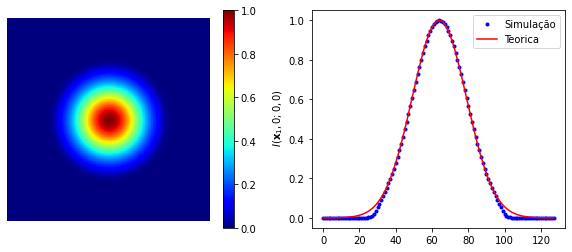

In [7]:
# Valor teorico 
Int_T =  np.exp( - x**2/(2*sigma**2 )  )
# show the total image of the incoherent sum
img = np.sum(abs(S)**2,2)
img = img/img.max()

plt.subplots(1,2,figsize=(10,4))

plt.subplot(1,2,1)
#plt.title("b)", loc = 'left')
plt.imshow(img,cmap='jet')
plt.colorbar()
plt.axis("off")

plt.subplot(1,2,2)
#plt.title("b)", loc = 'left')
plt.ylabel(" $I(\mathbf{x}_1,0;0,0)$")
plt.plot(img[:,64],'b.',label='Simulação')
plt.plot(Int_T,'r',label='Teorica')
plt.legend(loc=1)


plt.show()

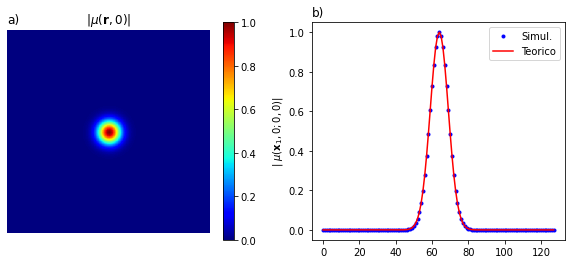

In [100]:
ref = [0,0]                        
index = np.where((xx==ref[0])*(yy==ref[1])==True)        
mu = np.zeros_like(S[:,:,1])
intMap = np.sum(abs(S)**2,2) 

for ii in range(0,n):
    for jj in range(0,n):
      mu[ii,jj] = np.sum( np.conj(S[ii,jj,:])*S[index[0],index[1],:]    )/np.sqrt(intMap[ii,jj]*intMap[index[0],index[1]])

img = abs(mu) 
img = img/img.max()
BB = np.exp(-x**2/(2*delta**2) )

fig, ax = plt.subplots(figsize=(10,4))

plt.subplot(1,2,1)
plt.title("a)", loc = 'left')
plt.imshow(img,cmap = "jet")
plt.title('|$\mu(\mathbf{r},0)$|')
plt.colorbar()
plt.axis("off")

plt.subplot(1,2,2)
plt.title("b)", loc = 'left')
plt.ylabel("| $\mu(\mathbf{x}_1,0;0,0)$|")
plt.plot(img[:,64],"b.", label='Simul.')
plt.plot(BB,"r",label='Teorico')
plt.legend(loc=1)
plt.show()


# Fenda dupla 

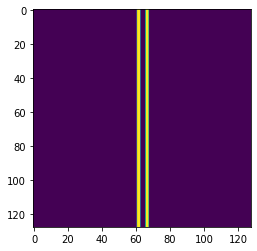

In [136]:
# Inicialização

class grid:
  pass
grid.N  = n;   
grid.dx = dx                               
grid.x  = np.arange(-grid.N/2,grid.N/2,1)*grid.dx;
[grid.xx,grid.yy] = np.meshgrid(grid.x,grid.x);  

d0 = .05*mm; 
a0 = (0.05/3)*mm; 
# make slit
fslit = (np.ones_like(grid.xx)*(abs(grid.xx+(d0/2))<=a0/2) +
         np.ones_like(grid.xx)*(abs(grid.xx-(d0/2))<=a0/2));
F  = Begin(abs(x[0])*2,lambd,n-1)  
plt.imshow(fslit);plt.show()

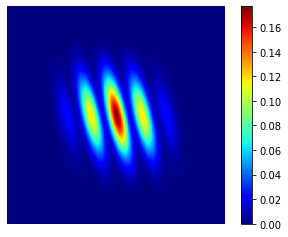

In [139]:
# passando pelas fendas --> soma incoerente

F = Begin(abs(x[0])*2,lambd,n)        # Criando o Campo no Lpipe
slitSS =[0]
FF = F.copy(F)
for i in range(lp_par.shape[0]):
  FF.field = S[:,:,i]*fslit
  FF1 = Forvard(1*cm,FF)
  slitSS += Intensity(FF1)
plt.imshow(slitSS,cmap = "jet");
plt.colorbar();
plt.axis("off")
plt.show()